In [1]:
#Questions
#top 10 job positions/titles/agencies with the highest base pay
#top 10 job positions/titles/agencies with the highest overtime pay
#top job positions/titles/agencies with overall highest pay
#any distinguishable trends

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('Citywide Payroll 2023.csv',low_memory=False)

In [4]:
df.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [5]:
df.tail()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
5662708,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,JUAN,NaN,10/02/2017,QUEENS,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1149.00,77575.47,3752.01
5662709,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,LUIS,NaN,08/21/2017,BRONX,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1037.75,70063.81,3206.96
5662710,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,PAUL,E,10/07/2019,QUEENS,SUPERVISOR PAINTER,ACTIVE,360.08,per Day,1820.0,93620.80,908.00,70035.56,617.28
5662711,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA BERMEO,HUGO,E,07/06/2022,QUEENS,PAINTER,ACTIVE,315.07,per Day,1771.0,79082.62,1005.75,67869.89,0.00
5662712,2023,996.0,NYC HOUSING AUTHORITY,ZURITA,MARK,NaN,06/10/1985,BRONX,HOUSING MANAGER,ACTIVE,95934.00,per Annum,1820.0,95671.16,0.00,0.00,1335.36


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662713 entries, 0 to 5662712
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 734.5+ MB


In [7]:
df.shape

(5662713, 17)

In [8]:
#checking to see if data has any null information
#null data does not affect my analysis
df.isnull().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                       13192
First Name                      13245
Mid Init                      2324561
Agency Start Date                  63
Work Location Borough          506233
Title Description                  96
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

In [9]:
#trying to see all the years which are listed in the data set
df.groupby(['Fiscal Year'])['Fiscal Year'].count()

Fiscal Year
2014    509525
2015    577880
2016    544817
2017    562266
2018    546161
2019    592431
2020    590210
2021    573477
2022    613008
2023    552938
Name: Fiscal Year, dtype: int64

In [10]:
#limitting the database to fisical year 2023
df[df['Fiscal Year']==2023]
df_2023=df[df['Fiscal Year']==2023]
df_2023

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
4908475,2023,2.0,OFFICE OF THE MAYOR,BROWN,CATAYDRA,K,04/12/2021,MANHATTAN,RESEARCH PROJECTS COORD,CEASED,95000.00,per Annum,0.00,0.00,0.00,0.00,2820.26
4908839,2023,2.0,OFFICE OF THE MAYOR,BROWN,STEVEN,J,05/22/2017,MANHATTAN,SPECIAL ASSISTANT,CEASED,65000.00,per Annum,0.00,0.00,0.00,0.00,4879.02
4908876,2023,2.0,OFFICE OF THE MAYOR,CHAN,JONATHAN,D,11/15/2021,MANHATTAN,STAFF ASSISTANT,ACTIVE,68000.00,per Annum,1820.00,66164.41,88.00,3086.52,0.00
4909133,2023,2.0,OFFICE OF THE MAYOR,HAKEM,ADIL,M,06/05/2023,MANHATTAN,SUMMER COLLEGE INTERN,ACTIVE,15.75,per Hour,32.75,515.81,0.00,0.00,0.00
4909645,2023,2.0,OFFICE OF THE MAYOR,PARKER,JASON,O,04/17/2017,MANHATTAN,SPECIAL ASSISTANT,CEASED,75000.00,per Annum,0.00,0.00,0.00,0.00,7733.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662708,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,JUAN,NaN,10/02/2017,QUEENS,PAINTER,ACTIVE,315.07,per Day,1820.00,81918.20,1149.00,77575.47,3752.01
5662709,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,LUIS,NaN,08/21/2017,BRONX,PAINTER,ACTIVE,315.07,per Day,1820.00,81918.20,1037.75,70063.81,3206.96
5662710,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,PAUL,E,10/07/2019,QUEENS,SUPERVISOR PAINTER,ACTIVE,360.08,per Day,1820.00,93620.80,908.00,70035.56,617.28
5662711,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA BERMEO,HUGO,E,07/06/2022,QUEENS,PAINTER,ACTIVE,315.07,per Day,1771.00,79082.62,1005.75,67869.89,0.00


In [11]:
#displaying all groups within pay basis
df_2023.groupby(['Pay Basis'])['Pay Basis'].count()

Pay Basis
Prorated Annual      2349
per Annum          338552
per Day            124341
per Hour            87696
Name: Pay Basis, dtype: int64

In [12]:
#trying to see the salary amoumts of prorated annual individuals
df_2023[df_2023['Pay Basis']== 'Prorated Annual']
df_pror=df_2023[df_2023['Pay Basis']== 'Prorated Annual']
df_pror.head(100)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
5112749,2023,13.0,BOROUGH PRESIDENT-QUEENS,ZHAO,MING,NaN,06/15/2008,QUEENS,CASHIER,CEASED,36537.0,Prorated Annual,0.0,733.98,0.0,0.0,0.0
5114581,2023,21.0,TAX COMMISSION,ALVAREZ,JANET,NaN,12/02/2015,MANHATTAN,COMMISSIONER,CEASED,25677.0,Prorated Annual,1150.0,22652.02,0.0,0.0,0.0
5114625,2023,21.0,TAX COMMISSION,NICHOLS,THOMAS,V,01/07/2020,MANHATTAN,COMMISSIONER,ACTIVE,25677.0,Prorated Annual,1300.0,25606.63,0.0,0.0,0.0
5114642,2023,21.0,TAX COMMISSION,SILVESTRI,CARLO,NaN,02/04/1990,MANHATTAN,COMMISSIONER,ACTIVE,25677.0,Prorated Annual,1300.0,25606.63,0.0,0.0,0.0
5114648,2023,21.0,TAX COMMISSION,TZANIDES,KYRIAKOS,P,03/12/2001,BROOKLYN,COMMISSIONER,ACTIVE,25677.0,Prorated Annual,1300.0,25606.63,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232144,2023,102.0,CITY COUNCIL,BAKSH,SHAFFINA,NaN,12/03/2010,MANHATTAN,COUNCIL MEMBER AIDE,ACTIVE,60500.0,Prorated Annual,1820.0,57227.46,0.0,0.0,4500.0
5232150,2023,102.0,CITY COUNCIL,BARNETT,ANN-MARIE,NaN,01/03/2022,MANHATTAN,COUNCIL MEMBER AIDE,ACTIVE,25000.0,Prorated Annual,1554.0,40753.42,0.0,0.0,5750.0
5232151,2023,102.0,CITY COUNCIL,BARRERA FLORES,MAX,NaN,12/12/2022,MANHATTAN,COUNCIL MEMBER AIDE,ACTIVE,45000.0,Prorated Annual,865.0,18698.61,0.0,0.0,0.0
5232154,2023,102.0,CITY COUNCIL,BARTH,NICOLE,J,11/08/2021,MANHATTAN,COUNCIL MEMBER AIDE,ACTIVE,63000.0,Prorated Annual,1820.0,62018.67,0.0,0.0,0.0


In [13]:
#trying to see all salaries within prorated annual group
df_pror.groupby(['Base Salary'])['Base Salary'].count().sort_values(ascending=False)

Base Salary
38786.0     347
31145.0     188
42365.0      59
60000.0      54
40911.0      45
           ... 
37490.0       1
37488.0       1
37481.0       1
37462.0       1
165090.0      1
Name: Base Salary, Length: 551, dtype: int64

In [14]:
#trying to see all title descriptions within the prorated annual group
df_pror.groupby(['Title Description'])['Title Description'].count().sort_values(ascending=False)

Title Description
SCHOOL LUNCH AIDE                                  846
COUNCIL MEMBER AIDE                                524
SENIOR SCHOOL LUNCH AIDE                           335
CITY SEASONAL AIDE                                 241
SCHOOL LUNCH ASSISTANT COOK                        103
COMMUNITY SERVICE AIDE                             101
SCHOOL LUNCH ASSISTANT                              44
CITY SECURITY AIDE                                  25
CHAPLAIN                                            22
COMMISSIONER                                        19
CITY SERVICE AIDE                                   17
ASSISTANT DISTRICT ATTORNEY                         11
ASSISTANT TO THE PUBLIC ADVOCATE                     7
COMMUNITY ASSOCIATE                                  5
COLLEGE AIDE                                         5
COMMUNITY ASSISTANT                                  4
ADMINISTRATIVE STAFF ANALYST                         4
OFFICE ASSISTANT                               

In [15]:
#creating dictionary of replacements for pay basis

pd.options.mode.chained_assignment = None 
replacements={'per Annum':'Per Annum','per Day':'Per Day','per Hour':'Per Hour', 'Prorated Annual':'Prorated Annual'}
df_2023['Pay Basis']=df_2023['Pay Basis'].map(replacements)

df_2023

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
4908475,2023,2.0,OFFICE OF THE MAYOR,BROWN,CATAYDRA,K,04/12/2021,MANHATTAN,RESEARCH PROJECTS COORD,CEASED,95000.00,Per Annum,0.00,0.00,0.00,0.00,2820.26
4908839,2023,2.0,OFFICE OF THE MAYOR,BROWN,STEVEN,J,05/22/2017,MANHATTAN,SPECIAL ASSISTANT,CEASED,65000.00,Per Annum,0.00,0.00,0.00,0.00,4879.02
4908876,2023,2.0,OFFICE OF THE MAYOR,CHAN,JONATHAN,D,11/15/2021,MANHATTAN,STAFF ASSISTANT,ACTIVE,68000.00,Per Annum,1820.00,66164.41,88.00,3086.52,0.00
4909133,2023,2.0,OFFICE OF THE MAYOR,HAKEM,ADIL,M,06/05/2023,MANHATTAN,SUMMER COLLEGE INTERN,ACTIVE,15.75,Per Hour,32.75,515.81,0.00,0.00,0.00
4909645,2023,2.0,OFFICE OF THE MAYOR,PARKER,JASON,O,04/17/2017,MANHATTAN,SPECIAL ASSISTANT,CEASED,75000.00,Per Annum,0.00,0.00,0.00,0.00,7733.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662708,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,JUAN,NaN,10/02/2017,QUEENS,PAINTER,ACTIVE,315.07,Per Day,1820.00,81918.20,1149.00,77575.47,3752.01
5662709,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,LUIS,NaN,08/21/2017,BRONX,PAINTER,ACTIVE,315.07,Per Day,1820.00,81918.20,1037.75,70063.81,3206.96
5662710,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,PAUL,E,10/07/2019,QUEENS,SUPERVISOR PAINTER,ACTIVE,360.08,Per Day,1820.00,93620.80,908.00,70035.56,617.28
5662711,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA BERMEO,HUGO,E,07/06/2022,QUEENS,PAINTER,ACTIVE,315.07,Per Day,1771.00,79082.62,1005.75,67869.89,0.00


In [16]:
#dropping all pay groups that are not Per Annum
df_2023[df_2023['Pay Basis']=='Per Annum']
df_annum=df_2023[df_2023['Pay Basis']=='Per Annum']

#limiting columns to wanted columns only
df_annum[['Fiscal Year', 'Agency Name', 'Title Description', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid','Total Other Pay']]
df_annum2=df_annum[['Fiscal Year', 'Agency Name', 'Title Description', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid','Total Other Pay']]
df_annum2

,Fiscal Year,Agency Name,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
4908475,2023,OFFICE OF THE MAYOR,RESEARCH PROJECTS COORD,95000.0,Per Annum,0.0,0.00,0.0,0.00,2820.26
4908839,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,65000.0,Per Annum,0.0,0.00,0.0,0.00,4879.02
4908876,2023,OFFICE OF THE MAYOR,STAFF ASSISTANT,68000.0,Per Annum,1820.0,66164.41,88.0,3086.52,0.00
4909645,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,75000.0,Per Annum,0.0,0.00,0.0,0.00,7733.88
4910453,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,95940.0,Per Annum,1820.0,95677.14,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
5662699,2023,NYC HOUSING AUTHORITY,SECRETARY,45728.0,Per Annum,1820.0,45855.30,0.0,0.00,5509.61
5662701,2023,NYC HOUSING AUTHORITY,CARETAKER,32950.0,Per Annum,80.0,-126.38,16.0,410.30,1263.84
5662702,2023,NYC HOUSING AUTHORITY,ASSISTANT HOUSING MANAGER,77454.0,Per Annum,1820.0,77241.83,0.0,0.00,1445.86
5662704,2023,NYC HOUSING AUTHORITY,CONTRACT SPECIALIST,65091.0,Per Annum,1820.0,64348.60,0.0,3.90,3000.00


In [17]:
#mean salary in 2023 with City Personnel that were paid Per Annum
df_annum2['Base Salary'].mean()

83204.64751039723

In [18]:
#max salary in 2023 with City Personnel that were paid Per Annum
df_annum2['Base Salary'].max()

363346.0

In [19]:
#checking to see if there were any null values in annum subset
df_annum2.isnull().sum()

Fiscal Year           0
Agency Name           0
Title Description     2
Base Salary           0
Pay Basis             0
Regular Hours         0
Regular Gross Paid    0
OT Hours              0
Total OT Paid         0
Total Other Pay       0
dtype: int64

In [20]:
#looking to see the top 10 paying positions in 2023 for City Personnel being paid per annum
df_annum2.sort_values(by=['Base Salary'], ascending=False). head(10)

,Fiscal Year,Agency Name,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
5386830,2023,DEPT OF ED PEDAGOGICAL,ASSISTANT SUPERINTENDENT,363346.0,Per Annum,0.0,20000.00,0.0,0.0,183121.21
5308219,2023,DEPT OF ED PEDAGOGICAL,CHANCELLOR,363346.0,Per Annum,0.0,363346.08,0.0,0.0,0.00
5113391,2023,OFFICE OF THE COMPTROLLER,PENSION INVESTMENT ADVISOR,350000.0,Per Annum,1610.0,308767.18,0.0,0.0,0.00
5649501,2023,NYC HOUSING AUTHORITY,EXECUTIVE AGENCY COUNSEL,350000.0,Per Annum,1820.0,327868.54,0.0,0.0,0.00
5111806,2023,OFFICE OF THE ACTUARY,CHIEF ACTUARY,325000.0,Per Annum,1505.0,261029.45,0.0,0.0,250.00
5111764,2023,OFFICE OF THE ACTUARY,CHIEF ACTUARY,311885.0,Per Annum,0.0,0.00,0.0,0.0,21447.44
5113440,2023,OFFICE OF THE COMPTROLLER,DIRECTOR OF INVESTMENTS,300000.0,Per Annum,1820.0,277123.29,0.0,0.0,0.00
5113156,2023,OFFICE OF THE COMPTROLLER,DIRECTOR OF INVESTMENTS,300000.0,Per Annum,210.0,34520.55,0.0,0.0,40117.42
5113240,2023,OFFICE OF THE COMPTROLLER,DIRECTOR OF INVESTMENTS,300000.0,Per Annum,1820.0,277123.29,0.0,0.0,0.00
5280056,2023,COMMUNITY COLLEGE (HOSTOS),PRESIDENT,283560.0,Per Annum,1820.0,282706.86,0.0,0.0,60000.00


Text(0, 0.5, 'Agencies')

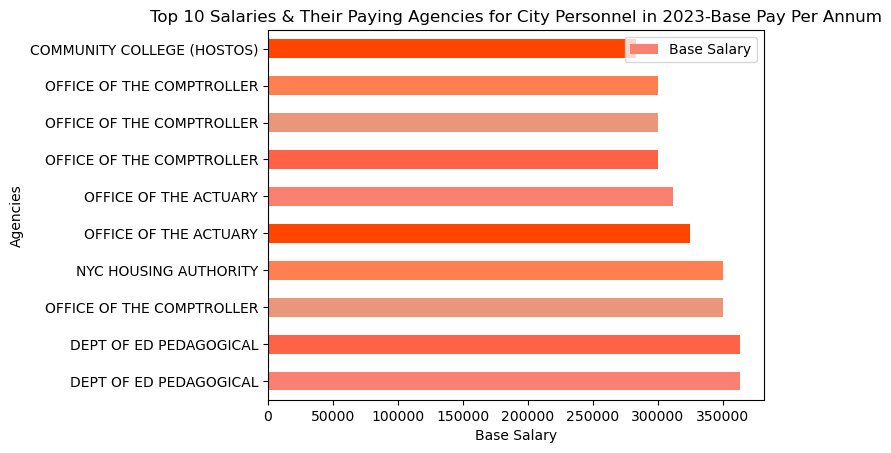

In [21]:
#displaying top 10 salaries for 2023 for City Personnel-Base Pay Per Annum
df_top10=df_annum2.sort_values(by=['Base Salary'], ascending=False). head(10)
df_top10.plot(kind='barh',y='Base Salary', x='Agency Name',color=['salmon', 'tomato', 'darksalmon', 'coral', 'orangered'])
plt.title('Top 10 Salaries & Their Paying Agencies for City Personnel in 2023-Base Pay Per Annum')
plt.xlabel("Base Salary")
plt.ylabel("Agencies")

/var/folders/mc/yr5t0bfj44l_9j4l8kdtkj540000gp/T/ipykernel_72717/2816536213.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_top10['Base Salary'])


<Axes: xlabel='Base Salary', ylabel='Density'>

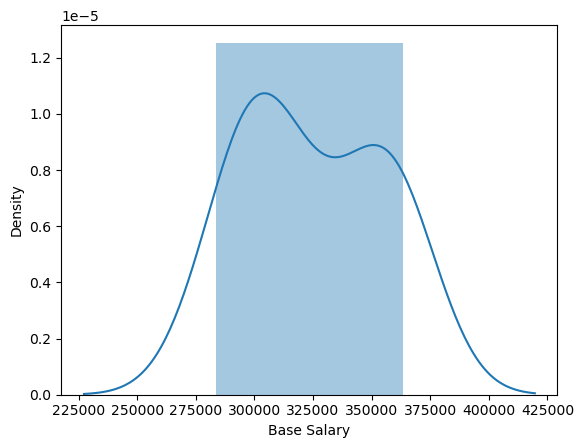

In [22]:
#displot displaying the top 10 base salary pay per annum
sns.distplot(df_top10['Base Salary'])

/var/folders/mc/yr5t0bfj44l_9j4l8kdtkj540000gp/T/ipykernel_72717/2282587338.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_annum2['Base Salary'])


<Axes: xlabel='Base Salary', ylabel='Density'>

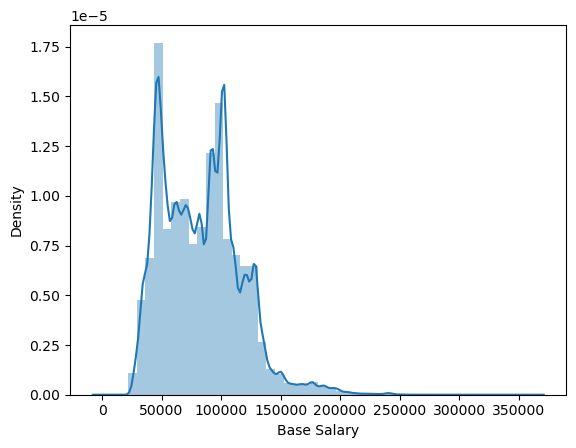

In [23]:
#distplot for the year of 2023 for all City Personnel that had Per Annum Salary
sns.distplot(df_annum2['Base Salary'])

In [24]:
#comparing mean base per annum salaries for 2021, 2022, and 2023
#2023 fiscal year
df_annum2['Base Salary'].mean()

83204.64751039723

In [25]:
#2022 fiscal year
df[df['Fiscal Year']==2022]
df_2022=df[df['Fiscal Year']==2022]

df_2022[df_2022['Pay Basis']=='per Annum']
df_annum22=df_2022[df_2022['Pay Basis']=='per Annum']
df_annum22['Base Salary'].mean()

81601.63440118899

In [26]:
#2021 fiscal year
df[df['Fiscal Year']==2021]
df_2021=df[df['Fiscal Year']==2021]

df_2021[df_2021['Pay Basis']=='per Annum']
df_annum21=df_2021[df_2021['Pay Basis']=='per Annum']
df_annum21['Base Salary'].mean()

80323.05726221146

Text(0, 0.5, 'Base Salary')

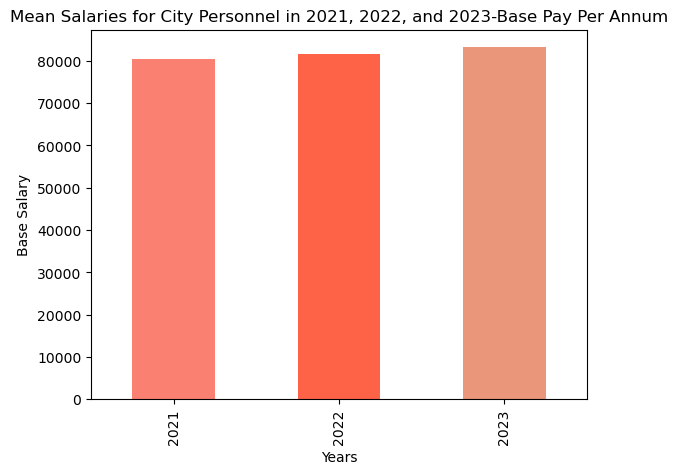

In [27]:
#putting the three subsets together for the years of 2021, 2022, and 2023
df_mean=pd.concat([df_annum2, df_annum22,df_annum21 ], axis=0)

#displaying the mean salaries for these 3 years for city personnel that are paid per annum
df_mean.groupby (['Fiscal Year'])['Base Salary'].mean().plot(kind='bar',color=['salmon', 'tomato', 'darksalmon'])
plt.title('Mean Salaries for City Personnel in 2021, 2022, and 2023-Base Pay Per Annum')
plt.xlabel('Years')
plt.ylabel('Base Salary')

Text(0, 0.5, 'Overtime Paid')

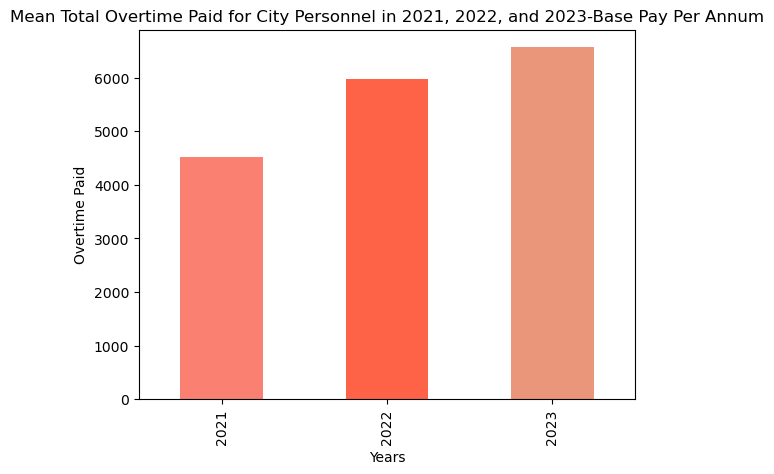

In [28]:
#displaying the mean OT paid for these 3 years for city personnel that are paid per annum
df_mean.groupby (['Fiscal Year'])['Total OT Paid'].mean().plot(kind='bar',color=['salmon', 'tomato', 'darksalmon'])
plt.title('Mean Total Overtime Paid for City Personnel in 2021, 2022, and 2023-Base Pay Per Annum')
plt.xlabel('Years')
plt.ylabel('Overtime Paid')

In [29]:
#mean total OT Paid in 2023, 2022, 2021
df_annum2['Total OT Paid'].mean(),df_annum22['Total OT Paid'].mean(),df_annum21['Total OT Paid'].mean()

(6567.447410353506, 5975.254856579835, 4519.157261891607)

In [30]:
#trying to see which jobs have the most OT paid within 2021, 2022, 2023
df_annum2.sort_values(by=['Total OT Paid'], ascending=False). head(10)
df_annum2ot=df_annum2.sort_values(by=['Total OT Paid'], ascending=False). head(10)

df_annum22.sort_values(by=['Total OT Paid'], ascending=False). head(10)
df_annum22ot=df_annum22.sort_values(by=['Total OT Paid'], ascending=False). head(10)

df_annum21.sort_values(by=['Total OT Paid'], ascending=False). head(10)
df_annum21ot=df_annum21.sort_values(by=['Total OT Paid'], ascending=False). head(10)

#putting the three subsets together for the years of 2021, 2022, and 2023
df_annumot=pd.concat([df_annum2ot, df_annum22ot,df_annum21ot], axis=0)
df_annumot2=df_annumot[['Fiscal Year', 'Agency Name', 'Title Description', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid','Total Other Pay']]
pd.options.display.max_rows = 30
df_annumot2.head(30)

,Fiscal Year,Agency Name,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
5225211,2023,DEPARTMENT OF CORRECTION,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,119979.0,Per Annum,2080.0,119650.18,2399.50,216920.99,14127.29
5228159,2023,DEPARTMENT OF CORRECTION,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,135511.0,Per Annum,2080.0,135139.69,2085.25,214140.97,25357.19
5229050,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,117732.67,2089.00,195519.61,19597.67
5223816,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,117732.67,1924.75,194775.50,30890.46
5227854,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,118214.73,1954.50,194549.65,28494.42
5223415,2023,DEPARTMENT OF CORRECTION,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,135511.0,Per Annum,2080.0,135139.69,1764.50,193915.77,21153.74
5185604,2023,FIRE DEPARTMENT,SUPERVISOR OF ELECTRICAL INSTALLATIONS & MAINT...,95722.0,Per Annum,1820.0,95840.65,2474.75,193855.29,14982.55
5225292,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,117732.67,2108.00,193166.30,17288.97
5230956,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,117732.67,1993.75,193089.35,17579.22
5226070,2023,DEPARTMENT OF CORRECTION,CAPTAIN,118056.0,Per Annum,2080.0,117732.67,1929.00,192446.17,25369.11


In [31]:
#list view for the most OT paid within 2021, 2022, 2023
df_annumot2.groupby(['Agency Name','Title Description'])['Title Description'].count().sort_values(ascending=False)

Agency Name                    Title Description                                   
DEPARTMENT OF CORRECTION       CAPTAIN                                                 9
                               WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92            8
DEPARTMENT OF SANITATION       SUPERVISOR                                              4
DEPARTMENT OF FINANCE          SUPERVISING DEPUTY SHERIFF - AL 1 ONLY 40 HR            3
BOARD OF ELECTION              ADMINISTRATIVE ASSOCIATE                                1
                               ASSOCIATE STAFF ANALYST                                 1
                               SENIOR SYSTEMS ANALYSTS                                 1
DEPT OF HEALTH/MENTAL HYGIENE  ADMINISTRATIVE STAFF ANALYST                            1
FIRE DEPARTMENT                MARINE ENGINEER                                         1
                               SUPERVISOR OF ELECTRICAL INSTALLATIONS & MAINTENANCE    1
Name: Title Description, d

In [32]:
#wanting to see who gets the highest payment overall including OT and Other Pay in addition to Salary
#creating new column for this
df_mean['Total Pay Overall']=df_mean['Base Salary']+df_mean['Total OT Paid']+df_mean['Total Other Pay']
df_tpo=df_mean[['Fiscal Year', 'Agency Name', 'Title Description', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid','Total Other Pay', 'Total Pay Overall']]
df_tpo.head()

,Fiscal Year,Agency Name,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Pay Overall
4908475,2023,OFFICE OF THE MAYOR,RESEARCH PROJECTS COORD,95000.0,Per Annum,0.0,0.00,0.0,0.00,2820.26,97820.26
4908839,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,65000.0,Per Annum,0.0,0.00,0.0,0.00,4879.02,69879.02
4908876,2023,OFFICE OF THE MAYOR,STAFF ASSISTANT,68000.0,Per Annum,1820.0,66164.41,88.0,3086.52,0.00,71086.52
4909645,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,75000.0,Per Annum,0.0,0.00,0.0,0.00,7733.88,82733.88
4910453,2023,OFFICE OF THE MAYOR,SPECIAL ASSISTANT,95940.0,Per Annum,1820.0,95677.14,0.0,0.00,0.00,95940.00


In [33]:
#trying to see which jobs have the most total paid overall within 2021, 2022, 2023
#2023 fiscal year
df_tpo[df_tpo['Fiscal Year']==2023]
df_tpo2=df_tpo[df_tpo['Fiscal Year']==2023]
df_tpo2.sort_values(by=['Total Pay Overall'], ascending=False). head(50)
df_tpo2ov=df_tpo2.sort_values(by=['Total Pay Overall'], ascending=False). head(50)

#2022 fiscal year
df_tpo[df_tpo['Fiscal Year']==2022]
df_tpo22=df_tpo[df_tpo['Fiscal Year']==2022]
df_tpo22.sort_values(by=['Total Pay Overall'], ascending=False). head(50)
df_tpo22ov=df_tpo22.sort_values(by=['Total Pay Overall'], ascending=False). head(50)

#2021 fiscal year
df_tpo[df_tpo['Fiscal Year']==2021]
df_tpo21=df_tpo[df_tpo['Fiscal Year']==2021]
df_tpo21.sort_values(by=['Total Pay Overall'], ascending=False). head(50)
df_tpo21ov=df_tpo21.sort_values(by=['Total Pay Overall'], ascending=False). head(50)

#putting the three subsets together for the years of 2021, 2022, and 2023
df_TPO=pd.concat([df_tpo2ov, df_tpo22ov,df_tpo21ov], axis=0)
#df_annumot2=df_annumot[['Fiscal Year', 'Agency Name', 'Title Description', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid','Total Other Pay']]
pd.options.display.max_rows = 150
df_TPO.head(150)

,Fiscal Year,Agency Name,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Pay Overall
5643056,2023,DISTRICT ATTORNEY-MANHATTAN,ADMINISTRATIVE CHIEF,200025.0,Per Annum,910.00,99737.78,0.00,0.00,479358.00,679383.00
5185032,2023,FIRE DEPARTMENT,ASSISTANT CHIEF OF DEPARTMENT,241119.0,Per Annum,0.00,0.00,0.00,0.00,305636.69,546755.69
5386830,2023,DEPT OF ED PEDAGOGICAL,ASSISTANT SUPERINTENDENT,363346.0,Per Annum,0.00,20000.00,0.00,0.00,183121.21,546467.21
5167765,2023,POLICE DEPARTMENT,COMMISSIONER,243171.0,Per Annum,0.00,0.00,0.00,0.00,242238.29,485409.29
5169562,2023,POLICE DEPARTMENT,CAPTAIN DETAILED AS CHIEF OF OPERATIONS,241116.0,Per Annum,0.00,0.00,0.00,0.00,240455.21,481571.21
5173365,2023,POLICE DEPARTMENT,CAPTAIN DETAILED AS ASSISTANT CHIEF,240511.0,Per Annum,0.00,0.00,0.00,0.00,240511.00,481022.00
5132856,2023,POLICE DEPARTMENT,CAPTAIN DETAILED AS ASSISTANT CHIEF,240511.0,Per Annum,0.00,0.00,0.00,0.00,240511.00,481022.00
5598514,2023,DEPARTMENT OF SANITATION,ADMINISTRATIVE STAFF ANALYST,239267.0,Per Annum,0.00,0.00,0.00,0.00,239267.00,478534.00
5129465,2023,POLICE DEPARTMENT,CAPTAIN DETAILED AS ASSISTANT CHIEF,240511.0,Per Annum,0.00,0.00,0.00,0.00,223956.44,464467.44
5599494,2023,DEPARTMENT OF SANITATION,DIRECTOR OF MOTOR EQUIPMENT MAINTENANCE,220388.0,Per Annum,0.00,0.00,0.00,0.00,220388.00,440776.00


In [34]:
#list view of the most Total Paid Overall within 2021, 2022, 2023
df_TPO.groupby(['Agency Name','Title Description'])['Title Description'].count().sort_values(ascending=False)

Agency Name                     Title Description                                  
POLICE DEPARTMENT               CAPTAIN DETAILED AS ASSISTANT CHIEF                    10
DEPARTMENT OF CORRECTION        WARDEN                                                  9
DEPARTMENT OF SANITATION        GENERAL SUPERINTENDENT                                  6
DEPARTMENT OF CORRECTION        WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92            6
DEPT OF ED PEDAGOGICAL          ASSISTANT SUPERINTENDENT                                5
POLICE DEPARTMENT               CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR           4
FIRE DEPARTMENT                 ASSISTANT CHIEF OF DEPARTMENT                           4
                                CHIEF FIRE MARSHAL                                      3
OFFICE OF THE COMPTROLLER       PENSION INVESTMENT ADVISOR                              3
DEPT OF ED PEDAGOGICAL          CHANCELLOR                                              3
                

Text(0, 0.5, 'Total Pay Overall')

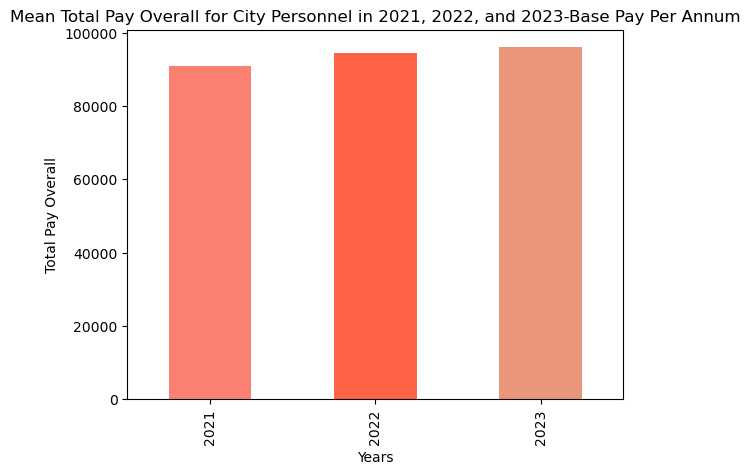

In [35]:
#displaying the mean Total Pay Overall for these 3 years for city personnel that are paid per annum
df_tpo.groupby (['Fiscal Year'])['Total Pay Overall'].mean().plot(kind='bar',color=['salmon', 'tomato', 'darksalmon'])
plt.title('Mean Total Pay Overall for City Personnel in 2021, 2022, and 2023-Base Pay Per Annum')
plt.xlabel('Years')
plt.ylabel('Total Pay Overall')

In [36]:
#mean Total Pay Overall Paid in 2023, 2022, 2021
df_tpo2['Total Pay Overall'].mean(),df_tpo22['Total Pay Overall'].mean(),df_tpo21['Total Pay Overall'].mean()

(95991.11654416457, 94485.33399633563, 90780.45450299216)

In [ ]:
#Questions
#top 10 job positions/titles/agencies with the highest base pay
#top 10 job positions/titles/agencies with the highest overtime pay
#top job positions/titles/agencies with overall highest pay
#any distinguishable trends
#analysis
Looking at this data set, I wanted to look at the overall highest paying jobs for City personnel, along with 
positions that pay the most overtime, and positions with the most total pay overall. Based on the data,
the overall mean salary for employees paid per annum has steadily increased from 2021, 2022, and 2023. Overtime 
payment had a sharp increase between the years of 2021 and 2022 along with the total payment overall for City 
personnel. It is important to note that within the column Total Other Pay, settlement amounts are included and not 
distinguished, so this could scew and affect the values seen in Total Pay Overall as some may not be the norm. 
Agencies with some of the highest overall pay include the Fire Department, Police Department, NYC Housing Authority, 
Colleges, Dept. of Corrections,Dept. of Ed Pedagocial, Office of The Comptroller, and many more. Agencies with 
the most overtime include the Dept. of Corrections, Sanitation and Finance. And lastly, agencies with the highest
paying salary per annum include the Dept. of Ed Pedagocial, Office of Comptroller, NYC Housing Authority, 
Colleges, and Office of the Actuary.